# Code 1.1 Plot of the Bell curve (the normal distribution)

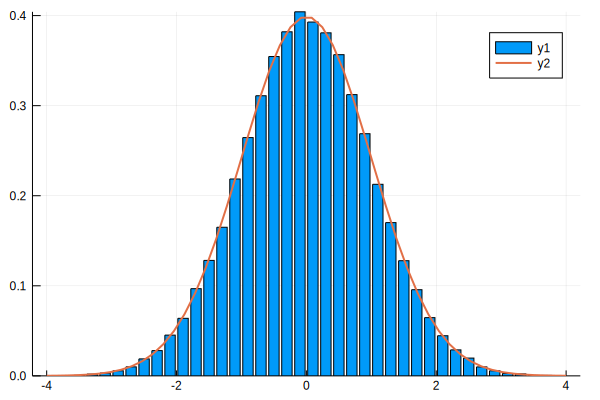

In [5]:
# Experiment : Generate random samples from the normal distribution
# Plot : Histogram of random samples
# Theory : The normal distribution curve

## Experiment
t  = 100000  # trials
dx = 0.2 
v = randn(t)

## Plot
using StatsBase, Plots #Install using Pkg.add("Plots") and install a pyplot backend using Pkg.add("PyPlot")
v_hist = fit(Histogram,v,closed=:left,-4:dx:4)
bar(v_hist.edges,v_hist.weights/(t*dx))

## Theory
x = linspace(-4,4)
plot!(x,exp.(-x.^2/2)/sqrt.(2*pi),linewidth=2)

# Code 1.2 Semicircle law (Random symmetric matrix eigenvalues)

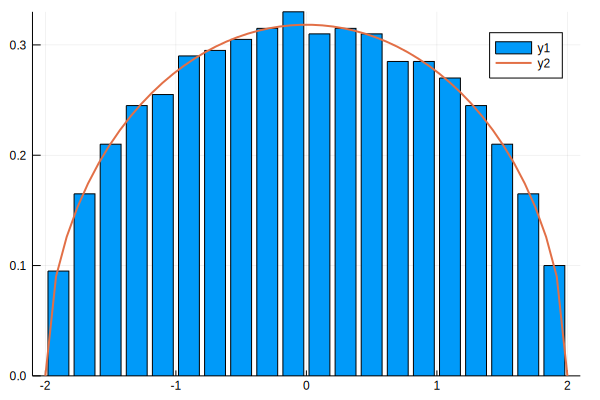

In [12]:
# Experiment :  Sample random symmetric Gaussian matrices
# Plot : Histogram of eigenvalues
# Theory : Semicircle as n --> infinity


## Parameters

n = 1000 # matrix size
t = 1   # trials
v = [] # eigenvalue samples
dx = 0.2  # bin size


## Experiment
for i = 1:t
    X = randn(n,n)               # n-by-n matrix of random Gaussians
    s = (X+X')/2                 #  symmetrize matrix
    v = append!(v,eigvals(s))    # eigenvalues
end
v=v/sqrt.(n/2)

## Plot
using StatsBase, Plots #Install using Pkg.add("Plots") and install a pyplot backend using Pkg.add("PyPlot")
v_hist = fit(Histogram,v,closed=:left,-2:dx:2)
bar(v_hist.edges,v_hist.weights/(t*dx*n))


## Theory
x = linspace(-2,2)
plot!(x,sqrt.(4-x.^2)/(2*pi),linewidth=2)

# Code 1.3 Compute and plot the Tracy-Widom (β = 2) distribution

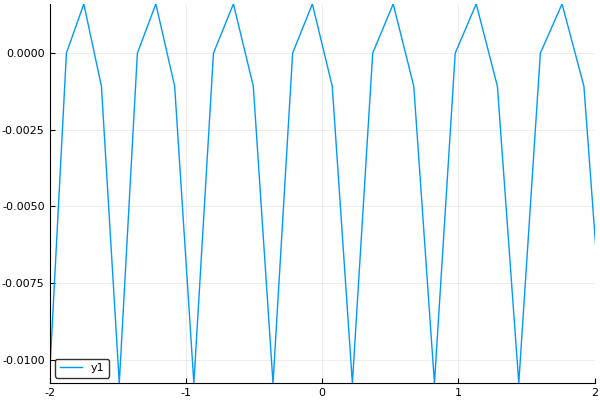

In [61]:
# Theory : Compute and plot the tracy widom distribution

## Parameters
t0 = 5.0     # right endpoint
tn = -8.0    # left endpoint
dx = 0.005 # discretization

## Theory : The differential equation solver
# Install the differential equations solver package with
# Pkg.add("DifferentialEquations")

using DifferentialEquations

# System of differential equations described in Eq.(1.6)
function tw_diff_eq_system(dy,y,p,t)
    dy[1] = y[2]
    dy[2] = t*y[1]+2*y[1]^3
    dy[3] = y[4]
    dy[4] = y[1] ^ 2
end

# To use airy opterator
# Pkg.add("SpecialFunctions")
using SpecialFunctions
y0 = [airyai.(t0);airyaiprime.(t0);0;(airyai.(t0))^2]
tspan = (t0,tn)
prob = ODEProblem(tw_diff_eq_system,y0,tspan)
sol = solve(prob,Vern8(),reltol=1e-12,abstol=1e-12)
F2 = exp.(-sol.u[:][3])
f2 = gradient(F2,sol.t)

## Plot
using StatsBase, Plots #Install using Pkg.add("Plots") and install a pyplot backend using Pkg.add("PyPlot")
x = linspace(-2,2)
plot(sol.t,f2,xlims=(-2,2))

# Code 1.4 The largest eigenvalue of a random symmetric matrix of Gaussians.

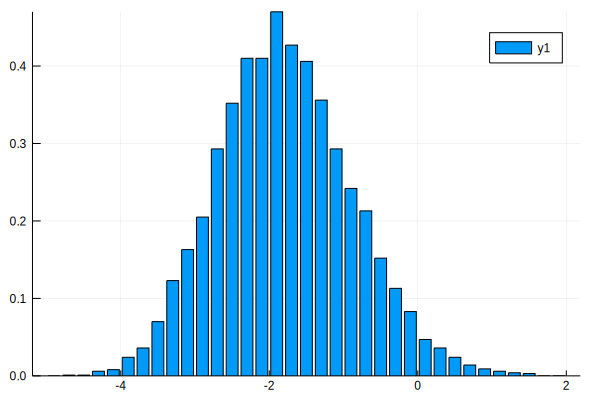

In [16]:
# Experiment  : Largest eigenvalue of random Hermitian matrices
# Plot        : Histogram of the normalized eigenvalues
# Theory      : Tracy-widom as n-> infinity


## Parameters
n = 100         # matrix size
t = 5000        # trials
v = Float64[]   # eigenvalue samples
dx = .2         # binsize

## Experiment
for i=1:t
    A = randn(n,n)+im*randn(n,n)           # n by n matrix of random Gaussians
    S = (A+A')/2                           # symmetrize matrix
    v = append!(v, maximum(eigvals(S)))    # eigenvalues
end
v = n^(1/6)*(v-2*√n)                       # normalize eigenvalues

## Plot
using StatsBase, Plots #Install using Pkg.add("Plots") and install a pyplot backend using Pkg.add("PyPlot")
v_hist = fit(Histogram,v,closed=:left,-5:dx:2)
bar(v_hist.edges,v_hist.weights/(t*dx))
